In [1]:
import pandas as pd
import numpy as np
import pymysql
from sqlalchemy import create_engine
import re
import os
from functools import reduce
pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
# import pandas as pd
# import math
# import matplotlib.pyplot as plt
# import datetime as dt
# from tensorflow.keras.models import Sequential, load_model
# from tensorflow.keras.layers import LSTM, Dense, Dropout, TimeDistributed
# from sklearn.preprocessing import MinMaxScaler, StandardScaler
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# from tensorflow.keras.optimizers import Adam
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard

# from tensorflow import keras


In [2]:
username = 'yuting'
password = 'yuting'
host_port = '35.194.136.165:3306'
database = 'twfruits'

engine = create_engine("mysql+pymysql://{}:{}@{}/{}".format(username, password, host_port, database))
con = engine.connect()

In [3]:
df = pd.read_sql('marketing_price_emperorguava', engine)
df.head()

,日期,市場,產品,上價,中價,下價,平均價(元/公斤),交易量(公斤)
0,100/01/07,104 台北二,P3 番石榴 帝王芭,28.0,26.1,20.0,25.3,48
1,100/01/08,104 台北二,P3 番石榴 帝王芭,41.0,30.9,18.0,30.4,56
2,100/01/14,104 台北二,P3 番石榴 帝王芭,20.0,20.0,20.0,20.0,33
3,100/01/15,104 台北二,P3 番石榴 帝王芭,25.0,25.0,25.0,25.0,40
4,100/01/18,104 台北二,P3 番石榴 帝王芭,31.4,21.3,12.0,21.4,66


In [4]:
from my_libs.my_model_trainer import *

X's shape: (3063, 30, 6)
y's shape: (3063, 5)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            18176     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 5)                 165       
Total params: 30,757
Trainable params: 30,757
Non-trainable params: 0
_________________________________________________________________
Epoch 1/12
22/22 [==============================] - 4s 51ms/step - loss: 0.6722 - val_loss: 0.0955

Epoch 00001: val_loss improved from inf to 0.09548, saving model to weights.h5
Epoch 2/12
22/22 [=======

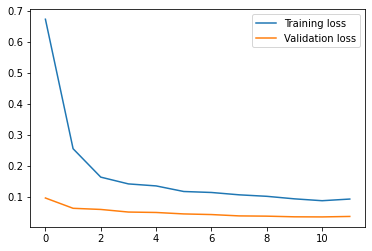

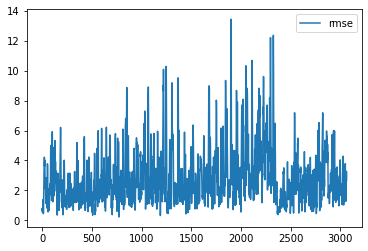

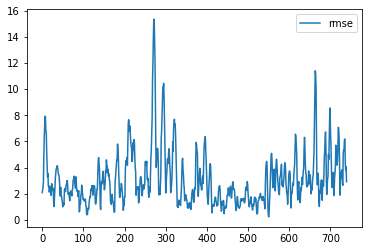

In [5]:
fruits = {"banana": ["banana", "scarletbanana", "guava"],
          "guava":  ["guava", 'emperorguava', 'banana']}

markets = ['台北二', '台北一', '三重區', '台中市']


for Type, fruit in fruits.items():
    for market in markets:
    
        # 讀取分析資料
        df = pd.read_sql(f"{Type}_{market}", engine)
    
        # 訓練集、測試集
        train_set, test_set = train_test_split(df)

        ### 訓練集part
        # 訓練集(sc)、訓練集預測(scaler)
        train_set_sc, sc_train_target = data_normalization(train_set)

        # 訓練集
        X_train, y_train = split_Xy(train_set_sc, n_future=5, n_past=30)

        # 創造momdel
        model = model_creator(n_steps=X_train.shape[1], n_features=X_train.shape[2], output=y_train.shape[1])

        # 訓練model
        trained_model = model_trainer(model, X_train, y_train, epoch=12, batch_size=128)

        # 訓練集驗證
        prediction_train, actual_train = model_validation(trained_model, X_train, y_train, sc_train_target)

        ### 測試集part
        # 測試集(sc)、測試集預測(scaler)
        test_set_sc, sc_test_target = data_normalization(test_set)

        # 測試集、test_scaler
        X_test, y_test = split_Xy(test_set_sc, n_future=5, n_past=30)

        # 測試集驗證
        prediction_test, actual_test = model_validation(trained_model, X_test, y_test, sc_test_target)
        
        # 儲存模型
        # model.save(f"C:/Users/Tibame/PycharmProjects/PythonETL/Fruit Price Prediction/models/{Type}_Price/{market}.h5")
        break
    break
        